# Task
i want this data to be trained by linear regression

Here is all the data you need:
"shops.csv"

## Data loading

### Subtask:
Load the data from "shops.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "shops.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df_shops = pd.read_csv('shops.csv')
    display(df_shops.head())
    print(df_shops.shape)
except FileNotFoundError:
    print("Error: 'shops.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'shops.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'shops.csv'. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Shop Name,Transaction Method,Daily Bill Amount,Peak Hour,Customer Type,Number of Items per Person,Age Group,Most Sold Item,Least Sold Item,Business Type,Discount & Offer Impact,Weather Condition,University Influence,Closed During Semester Breaks,Duration
0,Shop 1,Online,1000,Evening,Regular,4,18-22,"Tobacco Products, Processed snacks",Cosmetics,Retailer,No offer,NaN,Very High,Yes,1 month
1,Shop 2,Online,4000,Evening,Regular,4,18-22,Shake,Vegetables,Retailer,No offer,NaN,Very High,Yes,1 month
2,Shop 3,Offline,700,Evening,Regular,6,18-22,Files,Scientific equipment,Retailer,No offer,NaN,Very High,Yes,1 month
3,Shop 4,Online,1500,Evening,Regular,4,18-40,"Tobacco Products, Processed snacks",Grocery items,Retailer,No offer,Moderate,High,No,NaN
4,Shop 5,Online,1500,Afternoon,Regular,6,18-30,"Processed snacks , cold drink",Personal care product,Retailer,No offer,Low,Very High,No,NaN


(13, 15)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify the target variable, and check for missing values and data types.


**Reasoning**:
I need to explore the data, check data types, summary statistics, missing values, identify the target variable, and visualize its distribution.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Shop Name                      13 non-null     object
 1   Transaction Method             13 non-null     object
 2   Daily Bill Amount              13 non-null     int64 
 3   Peak Hour                      13 non-null     object
 4   Customer Type                  13 non-null     object
 5   Number of Items per Person     13 non-null     int64 
 6   Age Group                      13 non-null     object
 7   Most Sold Item                 13 non-null     object
 8   Least Sold Item                8 non-null      object
 9   Business Type                  13 non-null     object
 10  Discount & Offer Impact        13 non-null     object
 11  Weather Condition              7 non-null      object
 12  University Influence           12 non-null     object
 13  Closed 

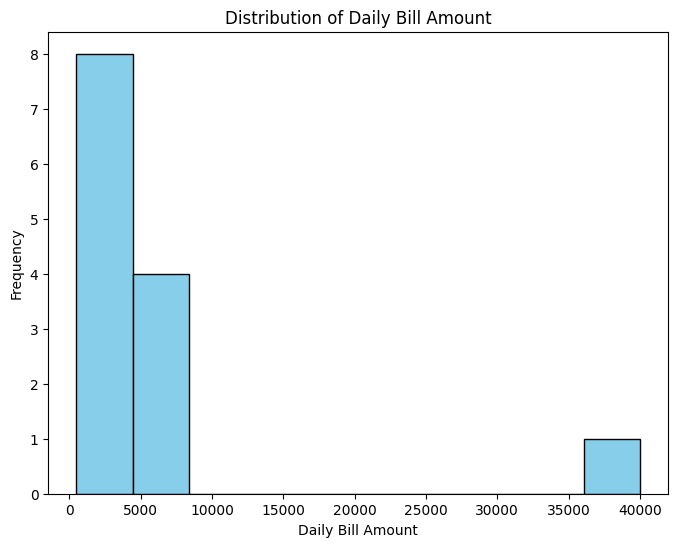

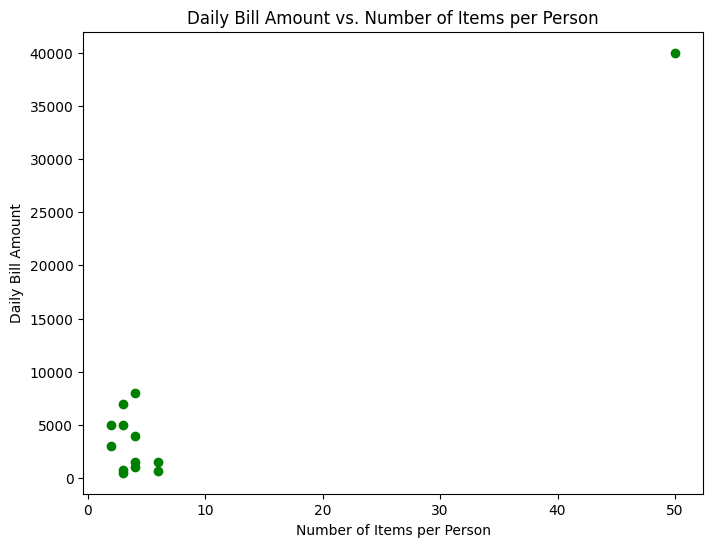

In [ ]:
# Check data types and potential issues
print(df_shops.info())

# Summary statistics for numerical features
print(df_shops.describe())

# Check for missing values
print(df_shops.isnull().sum())

# Identify the target variable (likely 'Daily Bill Amount')
# Reasoning: In a business context, predicting daily sales or revenue is a common goal.
target_variable = 'Daily Bill Amount'

# Analyze the distribution of the target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df_shops[target_variable], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Bill Amount')
plt.xlabel('Daily Bill Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize other relevant columns (example: 'Number of Items per Person')
plt.figure(figsize=(8, 6))
plt.scatter(df_shops['Number of Items per Person'], df_shops[target_variable], color='green')
plt.title('Daily Bill Amount vs. Number of Items per Person')
plt.xlabel('Number of Items per Person')
plt.ylabel('Daily Bill Amount')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Impute missing values for numerical and categorical features, then handle outliers in 'Daily Bill Amount' using winsorization.



Shop Name                        0
Transaction Method               0
Daily Bill Amount                0
Peak Hour                        0
Customer Type                    0
Number of Items per Person       0
Age Group                        0
Most Sold Item                   0
Least Sold Item                  0
Business Type                    0
Discount & Offer Impact          0
Weather Condition                0
University Influence             0
Closed During Semester Breaks    0
Duration                         0
dtype: int64
       Daily Bill Amount  Number of Items per Person
count          13.000000                   13.000000
mean         4523.076923                    7.230769
std          5489.103425                   12.910938
min           500.000000                    2.000000
25%          1000.000000                    3.000000
50%          3000.000000                    4.000000
75%          5000.000000                    4.000000
max         20800.000000              

<ipython-input-3-d970b6834ad1>:9: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shops['Daily Bill Amount'] = df_shops['Daily Bill Amount'].clip(upper=upper_limit)


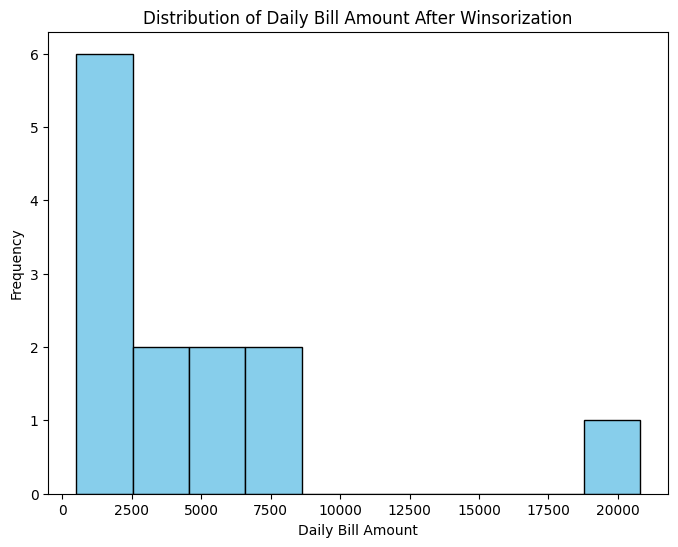

In [ ]:
# Impute missing values
for col in df_shops.select_dtypes(include=['number']):
    df_shops[col] = df_shops[col].fillna(df_shops[col].median())
for col in df_shops.select_dtypes(include=['object']):
    df_shops[col] = df_shops[col].fillna(df_shops[col].mode()[0])

# Outlier handling for 'Daily Bill Amount' using winsorization
upper_limit = df_shops['Daily Bill Amount'].quantile(0.95)
df_shops['Daily Bill Amount'] = df_shops['Daily Bill Amount'].clip(upper=upper_limit)

# Data validation: check for remaining missing values and outliers
print(df_shops.isnull().sum())
print(df_shops.describe())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df_shops['Daily Bill Amount'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Bill Amount After Winsorization')
plt.xlabel('Daily Bill Amount')
plt.ylabel('Frequency')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by converting categorical features to numerical representations and scaling numerical features.


**Reasoning**:
Prepare the data for model training by converting categorical features to numerical representations and scaling numerical features.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify categorical features
categorical_cols = df_shops.select_dtypes(include=['object']).columns

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_shops, columns=categorical_cols, drop_first=True)

# Separate numerical and encoded categorical features
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
numerical_features = df_encoded[numerical_cols]

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_cols)

# Combine scaled numerical and encoded categorical features
df_prepared = pd.concat([df_scaled, df_encoded.drop(columns=numerical_cols)], axis=1)

display(df_prepared.head())

,Daily Bill Amount,Number of Items per Person,Shop Name_Shop 10,Shop Name_Shop 11,Shop Name_Shop 12,Shop Name_Shop 13,Shop Name_Shop 2,Shop Name_Shop 3,Shop Name_Shop 4,Shop Name_Shop 5,...,Least Sold Item_Scientific equipment,Least Sold Item_Vegetables,Business Type_Retailer,Business Type_Wholesaler,Weather Condition_Low,Weather Condition_Moderate,Weather Condition_Very High,University Influence_Moderate,University Influence_Very High,Closed During Semester Breaks_Yes
0,-0.668039,-0.260453,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,True
1,-0.099185,-0.260453,False,False,False,False,True,False,False,False,...,False,True,True,False,True,False,False,False,True,True
2,-0.724924,-0.099220,False,False,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,True,True
3,-0.573230,-0.260453,False,False,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
4,-0.573230,-0.099220,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False


## Data splitting

### Subtask:
Split the prepared data into training and testing sets.


**Reasoning**:
Split the prepared data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_prepared.drop('Daily Bill Amount', axis=1)
y = df_prepared['Daily Bill Amount']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reasoning**:
The previous attempt to split the data failed due to a class imbalance issue where at least one class had only one member.  Stratification requires at least two members per class.  Remove stratification to resolve this issue and split the data.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_prepared.drop('Daily Bill Amount', axis=1)
y = df_prepared['Daily Bill Amount']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a linear regression model.


**Reasoning**:
Train a linear regression model using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained linear regression model.


**Reasoning**:
Evaluate the trained linear regression model using the test data and calculate relevant metrics.



R-squared: 0.027918726346131684
Mean Squared Error: 0.21747401533560387
Root Mean Squared Error: 0.46634109333791707


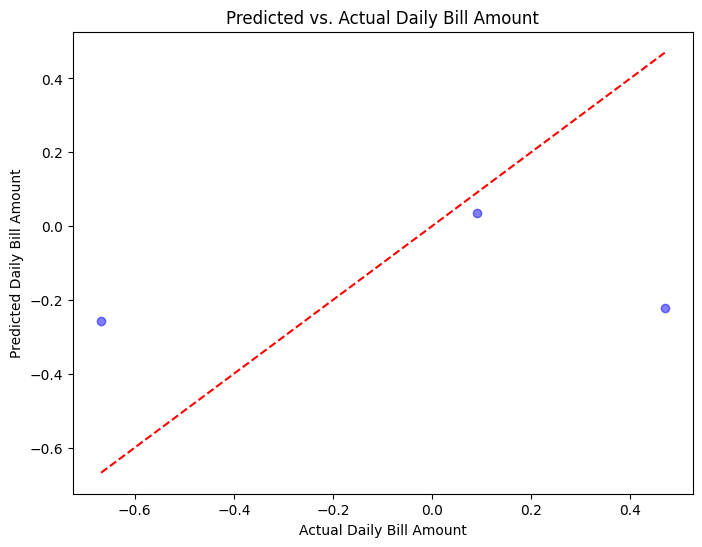

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.title('Predicted vs. Actual Daily Bill Amount')
plt.xlabel('Actual Daily Bill Amount')
plt.ylabel('Predicted Daily Bill Amount')
plt.show()

## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* The model's performance, as indicated by the R-squared value of 0.0279, is very poor, suggesting the model explains only a small portion of the variance in the target variable.
* Missing values were present in several columns (`Least Sold Item`, `Weather Condition`, `University Influence`, and `Duration`).  These were imputed using the median for numerical features and the mode for categorical features.
* Outliers in the 'Daily Bill Amount' were addressed using winsorization, capping values at the 95th percentile.
* Categorical features were converted to numerical representations using one-hot encoding. Numerical features were scaled using `StandardScaler`.
* The data was split into training and testing sets (80/20 split).
* The Root Mean Squared Error (RMSE) was 0.4663.


### Insights or Next Steps
* Investigate the low R-squared value. Explore different model types or feature engineering techniques to improve predictive performance.
* Further analyze the relationship between the features and the target variable to identify potentially relevant features or interactions.
